In [1]:
import pandas as pd

# STEP 1: Load your dataset
df = pd.read_csv("train.csv")

# STEP 2: Identify delinquency columns
delinquency_cols = [f"m{i}" for i in range(1, 38)]

# STEP 3: Create mX_missing columns
for col in delinquency_cols:
    df[f"{col}_missing"] = (df[col] == -1).astype(int)

# STEP 4: Retain all columns, reorder so mX and mX_missing are together
other_cols = [col for col in df.columns if col not in sum([[c, f"{c}_missing"] for c in delinquency_cols], [])]
ordered_cols = []
for col in delinquency_cols:
    ordered_cols.append(col)
    ordered_cols.append(f"{col}_missing")
df = df[other_cols + ordered_cols]

# STEP 5: Save the updated DataFrame
df.to_csv("with_mx_missing.csv", index=False)
print("✅ mX_missing columns added and saved to 'with_mx_missing.csv'")


✅ mX_missing columns added and saved to 'with_mx_missing.csv'


In [3]:
import pandas as pd

df = pd.read_csv("train_new.csv")
df.head()


,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,Loan_Term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m33,m33_missing,m34,m34_missing,m35,m35_missing,m36,m36_missing,m37,m37_missing
0,2.680000e+11,Z,"Turner, Baldwin and Rhodes",4.250,214000,12,01-03-2012,May-12,95,1,...,-1,1,-1,1,-1,1,-1,1,-1,1
1,6.730000e+11,Y,"Swanson, Newton and Miller",4.875,144000,24,01-01-2012,Mar-12,72,1,...,-1,1,-1,1,-1,1,-1,1,-1,1
2,7.430000e+11,Z,Thornton-Davis,3.250,366000,12,01-01-2012,Mar-12,49,1,...,-1,1,-1,1,-1,1,-1,1,-1,1
3,6.010000e+11,X,OTHER,4.750,135000,12,01-02-2012,Apr-12,46,2,...,-1,1,-1,1,-1,1,-1,1,-1,1
4,2.740000e+11,X,OTHER,4.750,124000,12,01-02-2012,Apr-12,80,1,...,-1,1,-1,1,-1,1,-1,1,-1,1


In [8]:
import pandas as pd

# Set Pandas to display all columns
pd.set_option('display.max_columns', None)

# If you want to set a wider display in the console or notebook
pd.set_option('display.width', 1000)

# Now, when you print df.head(), all columns will be shown
print(df.head())


        loan_id source       financial_institution  interest_rate  unpaid_principal_bal  Loan_Term origination_date first_payment_date  loan_to_value  number_of_borrowers  debt_to_income_ratio  borrower_credit_score loan_purpose  insurance_percent  co-borrower_credit_score  insurance_type          Occupation  Borrower_State EducationLevel MaritalStatus  Age  Gender EmploymentStatus  NumberOfDependents  Annual Income  m1  m1_missing  m2  m2_missing  m3  m3_missing  m4  m4_missing  m5  m5_missing  m6  m6_missing  m7  m7_missing  m8  m8_missing  m9  m9_missing  m10  m10_missing  m11  m11_missing  m12  m12_missing  m13  m13_missing  m14  m14_missing  m15  m15_missing  m16  m16_missing  m17  m17_missing  m18  m18_missing  m19  m19_missing  m20  m20_missing  m21  m21_missing  m22  m22_missing  m23  m23_missing  m24  m24_missing  m25  m25_missing  m26  m26_missing  m27  m27_missing  m28  m28_missing  m29  m29_missing  m30  m30_missing  m31  m31_missing  m32  m32_missing  m33  m33_missing  \
0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 99 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  float64
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   Loan_Term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  int64  
 10  debt_to_income_ratio      116058 non-null  int64  
 11  borrower_credit_score     116058 non-null  int64  
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  i

In [13]:
print(df.shape)


(116058, 99)


In [12]:
df.describe()

,loan_id,interest_rate,unpaid_principal_bal,Loan_Term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,Age,NumberOfDependents,Annual Income,m1,m1_missing,m2,m2_missing,m3,m3_missing,m4,m4_missing,m5,m5_missing,m6,m6_missing,m7,m7_missing,m8,m8_missing,m9,m9_missing,m10,m10_missing,m11,m11_missing,m12,m12_missing,m13,m13_missing,m14,m14_missing,m15,m15_missing,m16,m16_missing,m17,m17_missing,m18,m18_missing,m19,m19_missing,m20,m20_missing,m21,m21_missing,m22,m22_missing,m23,m23_missing,m24,m24_missing,m25,m25_missing,m26,m26_missing,m27,m27_missing,m28,m28_missing,m29,m29_missing,m30,m30_missing,m31,m31_missing,m32,m32_missing,m33,m33_missing,m34,m34_missing,m35,m35_missing,m36,m36_missing,m37,m37_missing
count,1.160580e+05,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.0,116058.000000,116058.0,116058.000000,116058.0,116058.000000,116058.0,116058.000000,116058.0,116058.000000,116058.0,116058.000000,116058.0,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,5.494154e+11,3.868961,2.082262e+05,20.999225,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003257,39.701287,1.528253,7674.774034,0.003197,0.0,0.002059,0.0,0.001973,0.0,0.002180,0.0,0.003533,0.0,0.003421,0.0,0.004162,0.0,-0.164961,0.166675,-0.165142,0.166675,-0.164495,0.166675,-0.164737,0.166675,-0.165098,0.166675,-0.166675,0.166675,-0.201279,0.333351,-0.200882,0.333351,-0.198711,0.333351,-0.198720,0.333351,-0.200891,0.333351,-0.200512,0.333351,-0.399309,0.500026,-0.398878,0.500026,-0.400386,0.500026,-0.400196,0.500026,-0.399025,0.500026,-0.400688,0.500026,-0.600889,0.666701,-0.600743,0.666701,-0.600855,0.666701,-0.598511,0.666701,-0.599580,0.666701,-0.600622,0.666701,-0.799531,0.833376,-0.800134,0.833376,-0.799764,0.833376,-0.800496,0.833376,-0.800763,0.833376,-0.801048,0.833376
std,2.597569e+11,0.461020,1.146851e+05,10.246692,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.056977,11.619786,1.389666,6373.272601,0.063354,0.0,0.051391,0.0,0.055427,0.0,0.062161,0.0,0.082638,0.0,0.087553,0.0,0.100961,0.0,0.376860,0.372687,0.377021,0.372687,0.378751,0.372687,0.378373,0.372687,0.376548,0.372687,0.372687,0.372687,0.651854,0.471413,0.652280,0.471413,0.654605,0.471413,0.654596,0.471413,0.652270,0.471413,0.652678,0.471413,0.664303,0.500002,0.664886,0.500002,0.662843,0.500002,0.663100,0.500002,0.664688,0.500002,0.662433,0.500002,0.609466,0.471394,0.609730,0.471394,0.609528,0.471394,0.613742,0.471394,0.611825,0.471394,0.609948,0.471394,0.477465,0.372641,0.475821,0.372641,0.476832,0.372641,0.474831,0.372641,0.474098,0.372641,0.473318,0.372641
min,1.000000e+11,2.250000,1.100000e+04,6.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,341.463415,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.0000

In [14]:
print(df.isnull().sum())


loan_id                  0
source                   0
financial_institution    0
interest_rate            0
unpaid_principal_bal     0
                        ..
m35_missing              0
m36                      0
m36_missing              0
m37                      0
m37_missing              0
Length: 99, dtype: int64


In [ ]:
import pandas as pd

duplicates = df.duplicated()
print(duplicates)


0         False
1         False
2         False
3         False
4         False
          ...  
116053    False
116054    False
116055    False
116056    False
116057    False
Length: 116058, dtype: bool


In [ ]:
import pandas as pd

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)


Empty DataFrame
Columns: [loan_id, source, financial_institution, interest_rate, unpaid_principal_bal, Loan_Term, origination_date, first_payment_date, loan_to_value, number_of_borrowers, debt_to_income_ratio, borrower_credit_score, loan_purpose, insurance_percent, co-borrower_credit_score, insurance_type, Occupation , Borrower_State, EducationLevel, MaritalStatus, Age, Gender, EmploymentStatus, NumberOfDependents, Annual Income, m1, m1_missing, m2, m2_missing, m3, m3_missing, m4, m4_missing, m5, m5_missing, m6, m6_missing, m7, m7_missing, m8, m8_missing, m9, m9_missing, m10, m10_missing, m11, m11_missing, m12, m12_missing, m13, m13_missing, m14, m14_missing, m15, m15_missing, m16, m16_missing, m17, m17_missing, m18, m18_missing, m19, m19_missing, m20, m20_missing, m21, m21_missing, m22, m22_missing, m23, m23_missing, m24, m24_missing, m25, m25_missing, m26, m26_missing, m27, m27_missing, m28, m28_missing, m29, m29_missing, m30, m30_missing, m31, m31_missing, m32, m32_missing, m33, m33

In [15]:
unique_genders = df['Gender'].unique()
print(unique_genders)


['Other' 'Female' 'Male']


In [16]:
unique_genders = df['source'].unique()
print(unique_genders)


['Z' 'Y' 'X']


In [17]:
unique_genders = df['insurance_type'].unique()
print(unique_genders)


[0 1]


In [18]:
unique_genders = df['loan_purpose'].unique()
print(unique_genders)


['C86' 'B12' 'A23']


In [23]:
unique_genders = df['Occupation '].unique()
print(unique_genders)


['loader reciever' 'home caregiver' 'Service technician ' ...
 'Product Design pilot' 'Floorpersom' 'DNS']


In [28]:
unique_genders = df['first_payment_date'].unique()
print(unique_genders)


['May-12' 'Mar-12' 'Apr-12' 'Feb-12']


In [38]:

unique_genders = df['EducationLevel'].unique()
print(unique_genders)

['High School' 'PhD' "Bachelor's" "Master's" 'Doctorate']


In [24]:
unique_genders = df['financial_institution'].unique()
print(unique_genders)


['Turner, Baldwin and Rhodes' 'Swanson, Newton and Miller'
 'Thornton-Davis' 'OTHER' 'Browning-Hart' 'Richardson Ltd'
 'Edwards-Hoffman' 'Richards-Walters' 'Martinez, Duffy and Bird'
 'Miller, Mcclure and Allen' 'Anderson-Taylor'
 'Taylor, Hunt and Rodriguez' 'Nicholson Group' 'Cole, Brooks and Vincent'
 'Sanchez, Hays and Wilkerson' 'Sanchez-Robinson' 'Suarez Inc'
 'Romero, Woods and Johnson' 'Chapman-Mcmahon']


In [ ]:
# Financial Institution
import pandas as pd

df_copy = df.copy()

df_copy = pd.get_dummies(df_copy, columns=['financial_institution'], drop_first=True)

print(df_copy.head())
print("Original columns:", df.columns)
print("New columns after encoding:", df_copy.columns)


        loan_id source  interest_rate  unpaid_principal_bal  Loan_Term origination_date first_payment_date  loan_to_value  number_of_borrowers  debt_to_income_ratio  borrower_credit_score loan_purpose  insurance_percent  co-borrower_credit_score  insurance_type          Occupation  Borrower_State EducationLevel MaritalStatus  Age  Gender EmploymentStatus  NumberOfDependents  Annual Income  m1  m1_missing  m2  m2_missing  m3  m3_missing  m4  m4_missing  m5  m5_missing  m6  m6_missing  m7  m7_missing  m8  m8_missing  m9  m9_missing  m10  m10_missing  m11  m11_missing  m12  m12_missing  m13  m13_missing  m14  m14_missing  m15  m15_missing  m16  m16_missing  m17  m17_missing  m18  m18_missing  m19  m19_missing  m20  m20_missing  m21  m21_missing  m22  m22_missing  m23  m23_missing  m24  m24_missing  m25  m25_missing  m26  m26_missing  m27  m27_missing  m28  m28_missing  m29  m29_missing  m30  m30_missing  m31  m31_missing  m32  m32_missing  m33  m33_missing  m34  m34_missing  m35  \
0  2.6

In [ ]:
import pandas as pd
df_copy = df.copy()
df_copy = pd.get_dummies(df_copy, columns=['loan_purpose'], drop_first=True)
print(df_copy.head())


        loan_id source       financial_institution  interest_rate  unpaid_principal_bal  Loan_Term origination_date first_payment_date  loan_to_value  number_of_borrowers  debt_to_income_ratio  borrower_credit_score  insurance_percent  co-borrower_credit_score  insurance_type          Occupation  Borrower_State EducationLevel MaritalStatus  Age  Gender EmploymentStatus  NumberOfDependents  Annual Income  m1  m1_missing  m2  m2_missing  m3  m3_missing  m4  m4_missing  m5  m5_missing  m6  m6_missing  m7  m7_missing  m8  m8_missing  m9  m9_missing  m10  m10_missing  m11  m11_missing  m12  m12_missing  m13  m13_missing  m14  m14_missing  m15  m15_missing  m16  m16_missing  m17  m17_missing  m18  m18_missing  m19  m19_missing  m20  m20_missing  m21  m21_missing  m22  m22_missing  m23  m23_missing  m24  m24_missing  m25  m25_missing  m26  m26_missing  m27  m27_missing  m28  m28_missing  m29  m29_missing  m30  m30_missing  m31  m31_missing  m32  m32_missing  m33  m33_missing  m34  \
0  2.6800

In [2]:
import pandas as pd

# Make a fresh copy of your original DataFrame
df_copy = df.copy()

# List all categorical columns you want to encode
categorical_cols = ['financial_institution', 'loan_purpose', 'Gender', 'EmploymentStatus', 'EducationLevel']

# One-hot encode all at once
df_copy = pd.get_dummies(df_copy, columns=categorical_cols, drop_first=True)

print(df_copy.head())
print(df_copy.columns)


NameError: name 'df' is not defined

In [ ]:
import pandas as pd

df_copy['origination_date'] = pd.to_datetime(df_copy['origination_date'], dayfirst=True, errors='coerce')
first_payment_str = df_copy['first_payment_date'].str.replace('-', ' ', regex=False)
df_copy['first_payment_date'] = pd.to_datetime(first_payment_str, format='%b %y', errors='coerce')

for col in ['origination_date', 'first_payment_date']:
    df_copy[f'{col}_year'] = df_copy[col].dt.year
    df_copy[f'{col}_month'] = df_copy[col].dt.month
    df_copy[f'{col}_day'] = df_copy[col].dt.day

df_copy['days_to_first_payment'] = (df_copy['first_payment_date'] - df_copy['origination_date']).dt.days

print(df_copy[['origination_date_year', 'origination_date_month', 'origination_date_day',
               'first_payment_date_year', 'first_payment_date_month', 'first_payment_date_day',
               'days_to_first_payment']].head())


   origination_date_year  origination_date_month  origination_date_day  first_payment_date_year  first_payment_date_month  first_payment_date_day  days_to_first_payment
0                   2012                       3                     1                     2012                         5                       1                     61
1                   2012                       1                     1                     2012                         3                       1                     60
2                   2012                       1                     1                     2012                         3                       1                     60
3                   2012                       2                     1                     2012                         4                       1                     60
4                   2012                       2                     1                     2012                         4                       1          

In [35]:
print(df_copy.columns.tolist())


['loan_id', 'source', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'origination_date', 'first_payment_date', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'Occupation ', 'Borrower_State', 'EducationLevel', 'MaritalStatus', 'Age', 'NumberOfDependents', 'Annual Income', 'm1', 'm1_missing', 'm2', 'm2_missing', 'm3', 'm3_missing', 'm4', 'm4_missing', 'm5', 'm5_missing', 'm6', 'm6_missing', 'm7', 'm7_missing', 'm8', 'm8_missing', 'm9', 'm9_missing', 'm10', 'm10_missing', 'm11', 'm11_missing', 'm12', 'm12_missing', 'm13', 'm13_missing', 'm14', 'm14_missing', 'm15', 'm15_missing', 'm16', 'm16_missing', 'm17', 'm17_missing', 'm18', 'm18_missing', 'm19', 'm19_missing', 'm20', 'm20_missing', 'm21', 'm21_missing', 'm22', 'm22_missing', 'm23', 'm23_missing', 'm24', 'm24_missing', 'm25', 'm25_missing', 'm26', 'm26_missing', 'm27', 'm27_missing', 'm28', 'm28_missing', 'm29', 'm29_mi

In [41]:
# Remove financial_institution if it exists
if 'financial_institution' in df_copy.columns:
    df_copy.drop(['financial_institution'], axis=1, inplace=True)

if 'EducationLevel' in df_copy.columns:
    df_copy.drop(['EducationLevel'], axis=1, inplace=True)

# Remove origination_date and first_payment_date if they exist
if 'origination_date' in df_copy.columns and 'first_payment_date' in df_copy.columns:
    df_copy.drop(['origination_date', 'first_payment_date'], axis=1, inplace=True)

if 'Gender' in df_copy.columns and 'EmploymentStatus' in df_copy.columns:
    df_copy.drop(['Gender', 'EmploymentStatus'], axis=1, inplace=True)    

# Print the updated column list to confirm
print(list(df_copy.columns))


['loan_id', 'source', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'Occupation ', 'Borrower_State', 'MaritalStatus', 'Age', 'NumberOfDependents', 'Annual Income', 'm1', 'm1_missing', 'm2', 'm2_missing', 'm3', 'm3_missing', 'm4', 'm4_missing', 'm5', 'm5_missing', 'm6', 'm6_missing', 'm7', 'm7_missing', 'm8', 'm8_missing', 'm9', 'm9_missing', 'm10', 'm10_missing', 'm11', 'm11_missing', 'm12', 'm12_missing', 'm13', 'm13_missing', 'm14', 'm14_missing', 'm15', 'm15_missing', 'm16', 'm16_missing', 'm17', 'm17_missing', 'm18', 'm18_missing', 'm19', 'm19_missing', 'm20', 'm20_missing', 'm21', 'm21_missing', 'm22', 'm22_missing', 'm23', 'm23_missing', 'm24', 'm24_missing', 'm25', 'm25_missing', 'm26', 'm26_missing', 'm27', 'm27_missing', 'm28', 'm28_missing', 'm29', 'm29_missing', 'm30', 'm30_missing', 'm31', 'm31_missing', 'm32', '

In [42]:
print(list(df_copy.columns))

['loan_id', 'source', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'Occupation ', 'Borrower_State', 'MaritalStatus', 'Age', 'NumberOfDependents', 'Annual Income', 'm1', 'm1_missing', 'm2', 'm2_missing', 'm3', 'm3_missing', 'm4', 'm4_missing', 'm5', 'm5_missing', 'm6', 'm6_missing', 'm7', 'm7_missing', 'm8', 'm8_missing', 'm9', 'm9_missing', 'm10', 'm10_missing', 'm11', 'm11_missing', 'm12', 'm12_missing', 'm13', 'm13_missing', 'm14', 'm14_missing', 'm15', 'm15_missing', 'm16', 'm16_missing', 'm17', 'm17_missing', 'm18', 'm18_missing', 'm19', 'm19_missing', 'm20', 'm20_missing', 'm21', 'm21_missing', 'm22', 'm22_missing', 'm23', 'm23_missing', 'm24', 'm24_missing', 'm25', 'm25_missing', 'm26', 'm26_missing', 'm27', 'm27_missing', 'm28', 'm28_missing', 'm29', 'm29_missing', 'm30', 'm30_missing', 'm31', 'm31_missing', 'm32', '

In [43]:
# Remove 'source' and 'MaritalStatus' columns from df_copy if they exist
cols_to_drop = ['source', 'MaritalStatus']
for col in cols_to_drop:
    if col in df_copy.columns:
        df_copy.drop(col, axis=1, inplace=True)

# Print the updated columns to confirm
print(list(df_copy.columns))


['loan_id', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'Occupation ', 'Borrower_State', 'Age', 'NumberOfDependents', 'Annual Income', 'm1', 'm1_missing', 'm2', 'm2_missing', 'm3', 'm3_missing', 'm4', 'm4_missing', 'm5', 'm5_missing', 'm6', 'm6_missing', 'm7', 'm7_missing', 'm8', 'm8_missing', 'm9', 'm9_missing', 'm10', 'm10_missing', 'm11', 'm11_missing', 'm12', 'm12_missing', 'm13', 'm13_missing', 'm14', 'm14_missing', 'm15', 'm15_missing', 'm16', 'm16_missing', 'm17', 'm17_missing', 'm18', 'm18_missing', 'm19', 'm19_missing', 'm20', 'm20_missing', 'm21', 'm21_missing', 'm22', 'm22_missing', 'm23', 'm23_missing', 'm24', 'm24_missing', 'm25', 'm25_missing', 'm26', 'm26_missing', 'm27', 'm27_missing', 'm28', 'm28_missing', 'm29', 'm29_missing', 'm30', 'm30_missing', 'm31', 'm31_missing', 'm32', 'm32_missing', 'm33', 'm33_m

In [47]:
print(df_copy.head())

        loan_id  interest_rate  unpaid_principal_bal  Loan_Term  loan_to_value  number_of_borrowers  debt_to_income_ratio  borrower_credit_score  insurance_percent  co-borrower_credit_score  insurance_type          Occupation  Borrower_State  Age  NumberOfDependents  Annual Income  m1  m1_missing  m2  m2_missing  m3  m3_missing  m4  m4_missing  m5  m5_missing  m6  m6_missing  m7  m7_missing  m8  m8_missing  m9  m9_missing  m10  m10_missing  m11  m11_missing  m12  m12_missing  m13  m13_missing  m14  m14_missing  m15  m15_missing  m16  m16_missing  m17  m17_missing  m18  m18_missing  m19  m19_missing  m20  m20_missing  m21  m21_missing  m22  m22_missing  m23  m23_missing  m24  m24_missing  m25  m25_missing  m26  m26_missing  m27  m27_missing  m28  m28_missing  m29  m29_missing  m30  m30_missing  m31  m31_missing  m32  m32_missing  m33  m33_missing  m34  m34_missing  m35  m35_missing  m36  m36_missing  m37  m37_missing  financial_institution_Browning-Hart  \
0  2.680000e+11          4.250

In [44]:
# Create a new DataFrame 'model' as a copy of 'df_copy'
model = df_copy.copy()


In [45]:
print(list(model.columns))

['loan_id', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'Occupation ', 'Borrower_State', 'Age', 'NumberOfDependents', 'Annual Income', 'm1', 'm1_missing', 'm2', 'm2_missing', 'm3', 'm3_missing', 'm4', 'm4_missing', 'm5', 'm5_missing', 'm6', 'm6_missing', 'm7', 'm7_missing', 'm8', 'm8_missing', 'm9', 'm9_missing', 'm10', 'm10_missing', 'm11', 'm11_missing', 'm12', 'm12_missing', 'm13', 'm13_missing', 'm14', 'm14_missing', 'm15', 'm15_missing', 'm16', 'm16_missing', 'm17', 'm17_missing', 'm18', 'm18_missing', 'm19', 'm19_missing', 'm20', 'm20_missing', 'm21', 'm21_missing', 'm22', 'm22_missing', 'm23', 'm23_missing', 'm24', 'm24_missing', 'm25', 'm25_missing', 'm26', 'm26_missing', 'm27', 'm27_missing', 'm28', 'm28_missing', 'm29', 'm29_missing', 'm30', 'm30_missing', 'm31', 'm31_missing', 'm32', 'm32_missing', 'm33', 'm33_m

In [48]:
# Ensure you're working on a clean copy
newmodel = df_copy.copy()



In [49]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Delinquency months (you can only predict up to m36 since m37 is last)
months = list(range(1, 37))

# Base features (make sure these columns exist in your dataset)
static_cols = [
    'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value',
    'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
    'insurance_percent', 'co-borrower_credit_score', 'insurance_type',
    'Age', 'NumberOfDependents', 'Annual Income',
]

# Add one-hot encoded categorical columns
for col in newmodel.columns:
    if col.startswith(('financial_institution_', 'loan_purpose_', 'Gender_',
                       'EmploymentStatus_', 'EducationLevel_')):
        static_cols.append(col)

# Prepare features and targets
X = []
y = []

for idx, row in newmodel.iterrows():
    for t in months:
        cur_m = f"m{t}"
        next_m = f"m{t+1}"
        next_m_missing = f"m{t+1}_missing"

        # Skip if this prediction month is invalid
        if next_m not in newmodel.columns:
            continue
        if row.get(next_m_missing, 1) == 1 or row.get(cur_m, -1) == -1 or row.get(next_m, -1) == -1:
            continue

        # Past payment history up to current month
        m_features = [row.get(f"m{i}", -1) for i in range(1, t + 1)]
        static_features = [row.get(feat, 0) for feat in static_cols]

        X.append(m_features + static_features)
        y.append(row[next_m])

# Train model if valid samples exist
if X:
    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
else:
    print("❌ No valid training samples. Check your mX/mX_missing values.")


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2437128,) + inhomogeneous part.

In [50]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# List of months for delinquency
months = list(range(1, 37))

# Base features (static loan + borrower features)
static_cols = [
    'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value',
    'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
    'insurance_percent', 'co-borrower_credit_score', 'insurance_type',
    'Age', 'NumberOfDependents', 'Annual Income',
]

# Add one-hot encoded categorical feature columns
for col in newmodel.columns:
    if col.startswith(('financial_institution_', 'loan_purpose_', 'Gender_',
                       'EmploymentStatus_', 'EducationLevel_')):
        static_cols.append(col)

X = []
y = []

# Loop through all rows in dataset
for idx, row in newmodel.iterrows():
    for t in months:
        cur_m = f"m{t}"
        next_m = f"m{t+1}"
        next_m_missing = f"m{t+1}_missing"

        # Skip if next month is invalid or current/next values are -1
        if next_m not in newmodel.columns:
            continue
        if row.get(next_m_missing, 1) == 1 or row.get(cur_m, -1) == -1 or row.get(next_m, -1) == -1:
            continue

        # Get delinquency history m1 to mt
        m_features = [row.get(f"m{i}", -1) for i in range(1, t + 1)]

        # Pad with -1 to reach length 36 (max months)
        m_features += [-1] * (36 - len(m_features))

        # Get static features
        static_features = [row.get(feat, 0) for feat in static_cols]

        # Final feature vector
        X.append(m_features + static_features)
        y.append(row[next_m])

# Convert to NumPy arrays and train model
if X:
    X = np.array(X)
    y = np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("✅ Model trained successfully.\n")
    print(classification_report(y_test, y_pred))
else:
    print("❌ No valid training samples. Check mX/mX_missing logic.")


c:\Users\kusha\anaconda3\envs\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\kusha\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


✅ Model trained successfully.

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    440505
           1       0.10      0.00      0.00     46866
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2

    accuracy                           0.90    487426
   macro avg       0.13      0.12      0.12    487426
weighted avg       0.83      0.90      0.86    487426



c:\Users\kusha\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kusha\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [51]:
# Ensure you're working on a clean copy
newm = df_copy.copy()



In [52]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# List of months for delinquency
months = list(range(1, 37))

# Base features (static loan + borrower features)
static_cols = [
    'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value',
    'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
    'insurance_percent', 'co-borrower_credit_score', 'insurance_type',
    'Age', 'NumberOfDependents', 'Annual Income',
]

# Add one-hot encoded categorical feature columns
for col in newmodel.columns:
    if col.startswith(('financial_institution_', 'loan_purpose_', 'Gender_',
                       'EmploymentStatus_', 'EducationLevel_')):
        static_cols.append(col)

X = []
y = []

# Loop through all rows in dataset
for idx, row in newm.iterrows():
    for t in months:
        cur_m = f"m{t}"
        next_m = f"m{t+1}"
        next_m_missing = f"m{t+1}_missing"

        # Skip if next month is invalid or current/next values are -1
        if next_m not in newmodel.columns:
            continue
        if row.get(next_m_missing, 1) == 1 or row.get(cur_m, -1) == -1 or row.get(next_m, -1) == -1:
            continue

        # Get delinquency history m1 to mt
        m_features = [row.get(f"m{i}", -1) for i in range(1, t + 1)]

        # Pad with -1 to reach length 36 (max months)
        m_features += [-1] * (36 - len(m_features))

        # Get static features
        static_features = [row.get(feat, 0) for feat in static_cols]

        # Final feature vector
        X.append(m_features + static_features)
        # Binary target: 0 = no delinquency, 1 = any delinquency
        y.append(1 if row[next_m] > 0 else 0)

# Convert to NumPy arrays and train model
if X:
    X = np.array(X)
    y = np.array(y)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    model = LogisticRegression(
        max_iter=5000,
        class_weight='balanced',
        solver='saga',
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("✅ Model trained successfully.\n")
    print(classification_report(y_test, y_pred))
else:
    print("❌ No valid training samples. Check mX/mX_missing logic.")


✅ Model trained successfully.

              precision    recall  f1-score   support

           0       1.00      0.58      0.73    440562
           1       0.20      0.99      0.33     46864

    accuracy                           0.62    487426
   macro avg       0.60      0.78      0.53    487426
weighted avg       0.92      0.62      0.69    487426



                                            Feature  Coefficient  Abs_Coefficient
12                                              m13     2.747436         2.747436
11                                              m12    -0.298290         0.298290
6                                                m7    -0.180871         0.180871
1                                                m2     0.174433         0.174433
3                                                m4     0.151705         0.151705
..                                              ...          ...              ...
14                                              m15    -0.000196         0.000196
59  financial_institution_Romero, Woods and Johnson     0.000173         0.000173
15                                              m16     0.000060         0.000060
45                                   insurance_type     0.000025         0.000025
16                                              m17     0.000016         0.000016

[77 rows x 3 co

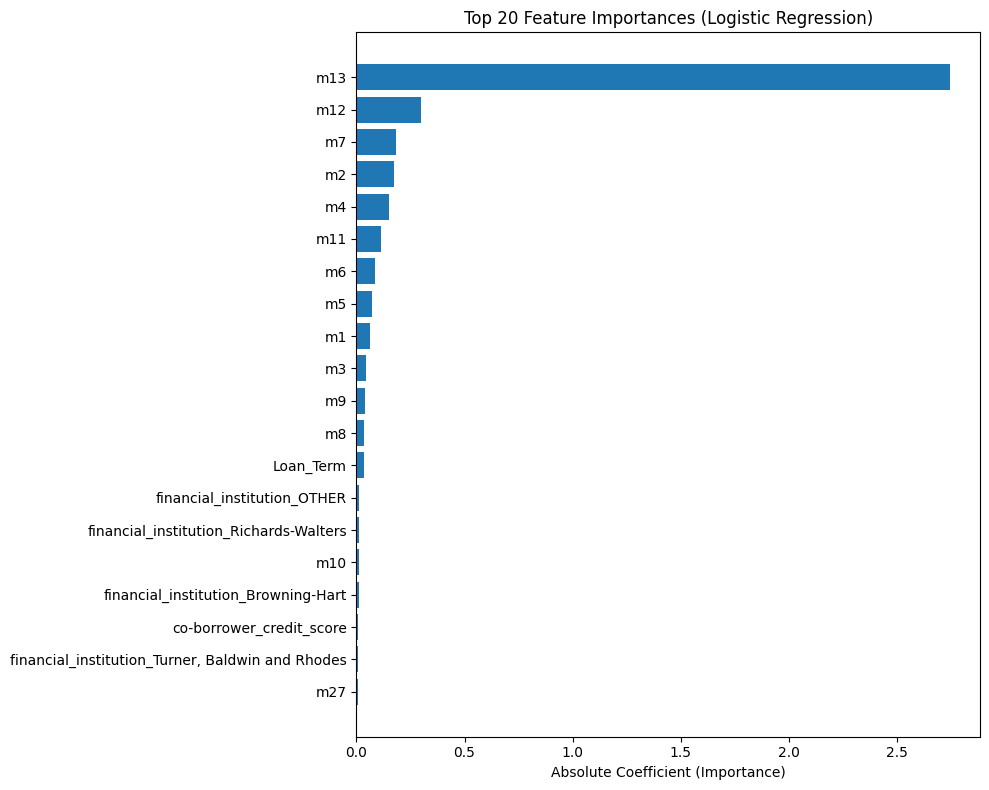

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define your static and one-hot encoded feature columns (as in your model)
static_cols = [
    'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value',
    'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
    'insurance_percent', 'co-borrower_credit_score', 'insurance_type',
    'Age', 'NumberOfDependents', 'Annual Income',
]

# Add one-hot encoded categorical feature columns
for col in newm.columns:
    if col.startswith(('financial_institution_', 'loan_purpose_', 'Gender_',
                       'EmploymentStatus_', 'EducationLevel_')):
        static_cols.append(col)

# 2. Build the full feature name list (delinquency history + statics)
m_features = [f"m{i}" for i in range(1, 37)]
all_feature_names = m_features + static_cols

# 3. Get model coefficients (assume model is already trained)
coefs = model.coef_[0]

# 4. Create DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Coefficient': coefs,
    'Abs_Coefficient': np.abs(coefs)
})

# 5. Sort by absolute value
importance_df = importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# 6. Print the ranked feature importances
print(importance_df[['Feature', 'Coefficient', 'Abs_Coefficient']])

# 7. (Optional) Plot top 20 feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'][:20][::-1], importance_df['Abs_Coefficient'][:20][::-1])
plt.xlabel('Absolute Coefficient (Importance)')
plt.title('Top 20 Feature Importances (Logistic Regression)')
plt.tight_layout()
plt.show()


In [54]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# List of months for delinquency
months = list(range(1, 37))

# Base features (static loan + borrower features)
static_cols = [
    'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value',
    'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
    'insurance_percent', 'co-borrower_credit_score', 'insurance_type',
    'Age', 'NumberOfDependents', 'Annual Income',
]

# Add one-hot encoded categorical feature columns
for col in newmodel.columns:
    if col.startswith(('financial_institution_', 'loan_purpose_', 'Gender_',
                       'EmploymentStatus_', 'EducationLevel_')):
        static_cols.append(col)

X = []
y = []

# Filter dataset for loans with term 36 only
newm_36 = newm[newm['Loan_Term'] == 36]

# Loop through all rows in filtered dataset
for idx, row in newm_36.iterrows():
    for t in months:
        cur_m = f"m{t}"
        next_m = f"m{t+1}"
        next_m_missing = f"m{t+1}_missing"

        # Skip if next month is invalid or current/next values are -1
        if next_m not in newmodel.columns:
            continue
        if row.get(next_m_missing, 1) == 1 or row.get(cur_m, -1) == -1 or row.get(next_m, -1) == -1:
            continue

        # Get delinquency history m1 to mt
        m_features = [row.get(f"m{i}", -1) for i in range(1, t + 1)]

        # Pad with -1 to reach length 36 (max months)
        m_features += [-1] * (36 - len(m_features))

        # Get static features
        static_features = [row.get(feat, 0) for feat in static_cols]

        # Final feature vector
        X.append(m_features + static_features)
        # Binary target: 0 = no delinquency, 1 = any delinquency
        y.append(1 if row[next_m] > 0 else 0)

# Convert to NumPy arrays and train model
if X:
    X = np.array(X)
    y = np.array(y)

    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    model = LogisticRegression(
        max_iter=5000,
        class_weight='balanced',
        solver='saga',
        random_state=42
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    print("✅ Model trained successfully.\n")
    print(classification_report(y_test, y_pred))
else:
    print("❌ No valid training samples. Check mX/mX_missing logic.")


✅ Model trained successfully.

              precision    recall  f1-score   support

           0       1.00      0.38      0.55    120581
           1       0.20      1.00      0.33     18653

    accuracy                           0.47    139234
   macro avg       0.60      0.69      0.44    139234
weighted avg       0.89      0.47      0.53    139234



In [56]:
!pip install -U imbalanced-learn


In [57]:
!pip install imbalanced-learn


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# STEP 1: Create mX_missing columns directly on newm
for i in range(1, 38):
    col = f'm{i}'
    missing_col = f'm{i}_missing'
    newm[missing_col] = newm[col].apply(lambda x: 1 if x == -1 else 0)

# STEP 2: Prepare X and y
X = []
y = []

# Base features excluding mX and loan_id
base_features = [col for col in newm.columns if not col.startswith('m') and col != 'loan_id']

# Create features and target
for index, row in newm.iterrows():
    term = row['Loan_Term']
    for i in range(1, term):
        curr_month = f'm{i}'
        next_month = f'm{i+1}'
        next_missing = f'{next_month}_missing'

        if next_month not in newm.columns or next_missing not in newm.columns:
            continue

        if row[next_missing] == 1:
            continue  # Skip if next month's data is missing

        feature_row = row[base_features].tolist()

        # Add payment history up to month i
        for j in range(1, i+1):
            feature_row.append(row[f'm{j}'])

        X.append(feature_row)
        y.append(row[next_month])  # Target = delinquency in next month

# STEP 3: Convert to arrays
X = np.array(X, dtype=object)
y = np.array(y)

print("✅ Feature and label arrays created.")
print(f"Total samples: {len(X)}")

# STEP 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 5: Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 6: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# STEP 7: Train Logistic Regression model
model = LogisticRegression(max_iter=5000, solver='saga', penalty='l2', class_weight='balanced')
model.fit(X_train_res, y_train_res)

# STEP 8: Evaluate
y_pred = model.predict(X_test)
print("\n✅ Model trained successfully.\n")
print(classification_report(y_test, y_pred))


✅ Feature and label arrays created.
Total samples: 2321070


ValueError: setting an array element with a sequence.

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# STEP 1: Flag missing values for m1 to m37
for i in range(1, 38):
    col = f'm{i}'
    missing_col = f'{col}_missing'
    newm[missing_col] = newm[col].apply(lambda x: 1 if x == -1 else 0)

# STEP 2: Build feature and label arrays
X = []
y = []

# Define static features to use for m1 prediction and all others
static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']  # Update as per actual column names

for index, row in newm.iterrows():
    term = row['Loan_Term']

    # 1. Predict m1 using only static features
    if 'm1' in newm.columns and row['m1'] != -1:
        X.append([row[feat] for feat in static_features])
        y.append(1 if row['m1'] > 0 else 0)  # Binary target

    # 2. Predict m2 to m_term using static + m1 to m(t-1)
    for t in range(2, term + 1):
        target_col = f'm{t}'
        target_missing = f'{target_col}_missing'

        if target_col not in newm.columns or row[target_missing] == 1:
            continue

        if any(row[f'm{j}'] == -1 for j in range(1, t)):
            continue  # Skip if any prior month is missing

        features = [row[feat] for feat in static_features]
        for j in range(1, t):
            features.append(row[f'm{j}'])

        X.append(features)
        y.append(1 if row[target_col] > 0 else 0)  # Binary target

# Convert to NumPy
X = np.array(X)
y = np.array(y)

print("✅ Binary classification dataset prepared.")
print(f"Total samples: {len(X)}")

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 5: Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# STEP 6: Logistic Regression
model = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')
model.fit(X_train_res, y_train_res)

# STEP 7: Evaluation
y_pred = model.predict(X_test)
print("\n✅ Model trained and evaluated on binary delinquency.\n")
print(classification_report(y_test, y_pred))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2437128,) + inhomogeneous part.

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# STEP 1: Flag missing values for m1 to m37
for i in range(1, 38):
    col = f'm{i}'
    missing_col = f'{col}_missing'
    newm[missing_col] = newm[col].apply(lambda x: 1 if x == -1 else 0)

# STEP 2: Build feature and label arrays
X = []
y = []

# Define static features to use for m1 prediction and all others
static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']  # Update as per actual column names

for index, row in newm.iterrows():
    term = row['Loan_Term']

    # 1. Predict m1 using only static features
    if 'm1' in newm.columns and row['m1'] != -1:
        feature_row = [row[feat] for feat in static_features]
        if len(feature_row) == len(static_features):  # Check if the length matches
            X.append(feature_row)
            y.append(1 if row['m1'] > 0 else 0)  # Binary target

    # 2. Predict m2 to m_term using static + m1 to m(t-1)
    for t in range(2, term + 1):
        target_col = f'm{t}'
        target_missing = f'{target_col}_missing'

        if target_col not in newm.columns or row[target_missing] == 1:
            continue

        # Check if prior months are available
        if any(row[f'm{j}'] == -1 for j in range(1, t)):
            continue  # Skip if any prior month is missing

        # Create feature set: static + prior months (m1 to m(t-1))
        feature_row = [row[feat] for feat in static_features]
        for j in range(1, t):
            feature_row.append(row[f'm{j}'])

        if len(feature_row) == len(static_features) + (t - 1):  # Ensure feature consistency
            X.append(feature_row)
            y.append(1 if row[target_col] > 0 else 0)  # Binary target

# Ensure consistent length for all feature vectors
max_length = max(len(row) for row in X)  # Find the max length of any feature vector

# Pad shorter feature vectors with zeros
X_padded = []
for row in X:
    padded_row = row + [0] * (max_length - len(row))  # Pad with zeros
    X_padded.append(padded_row)

# Convert to NumPy arrays
X = np.array(X_padded)
y = np.array(y)

# Check if X and y are valid before continuing
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset prepared.")
print(f"Total samples: {len(X)}")

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 5: Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# STEP 6: Logistic Regression
model = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')
model.fit(X_train_res, y_train_res)

# STEP 7: Evaluation
y_pred = model.predict(X_test)
print("\n✅ Model trained and evaluated on binary delinquency.\n")
print(classification_report(y_test, y_pred))


X shape: (2437128, 40)
y shape: (2437128,)
✅ Binary classification dataset prepared.
Total samples: 2437128

✅ Model trained and evaluated on binary delinquency.

              precision    recall  f1-score   support

           0       0.95      0.76      0.84    443174
           1       0.20      0.61      0.30     44252

    accuracy                           0.74    487426
   macro avg       0.58      0.68      0.57    487426
weighted avg       0.88      0.74      0.79    487426



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


for i in range(1, 38):
    col = f'm{i}'
    missing_col = f'{col}_missing'
    newm[missing_col] = newm[col].apply(lambda x: 1 if x == -1 else 0)


X = []
y = []


static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']  # Update as needed

max_term = newm['Loan_Term'].max()

for _, row in newm.iterrows():
    term = row['Loan_Term']

    
    if 'm1' in newm.columns and row['m1'] != -1:
        X.append([row[feat] for feat in static_features] + [0] * (max_term - 1))
        y.append(1 if row['m1'] > 0 else 0)

   
    for t in range(2, term + 1):
        target_col = f'm{t}'
        target_missing = f'{target_col}_missing'

        if target_col not in newm.columns or row[target_missing] == 1:
            continue

        if any(row[f'm{j}'] == -1 for j in range(1, t)):
            continue

        features = [row[feat] for feat in static_features]
        for j in range(1, t):
            features.append(row[f'm{j}'])
        features += [0] * (max_term - (t - 1)) 

        X.append(features)
        y.append(1 if row[target_col] > 0 else 0)


X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset prepared.")
print(f"Total samples: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['saga']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.5, 0.7, 0.9],
        'solver': ['saga']
    }
]

grid_search = GridSearchCV(LogisticRegression(max_iter=5000, class_weight='balanced'),
                           param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1)

grid_search.fit(X_train_res, y_train_res)

best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

print("\n✅ Model trained and evaluated on binary delinquency.\n")
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2437128,) + inhomogeneous part.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=UserWarning)  


for i in range(1, 38):
    col = f'm{i}'
    missing_col = f'{col}_missing'
    newm[missing_col] = newm[col].apply(lambda x: 1 if x == -1 else 0)

X = []
y = []

static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']  # Update as needed
max_term = newm['Loan_Term'].max()

for _, row in newm.iterrows():
    term = row['Loan_Term']

   
    if 'm1' in newm.columns and row['m1'] != -1:
        features = [row[feat] for feat in static_features]
        features += [0] * (max_term - 1)  
        X.append(features)
        y.append(1 if row['m1'] > 0 else 0)

   
    for t in range(2, term + 1):
        target_col = f'm{t}'
        target_missing = f'{target_col}_missing'

        if target_col not in newm.columns or row[target_missing] == 1:
            continue
        if any(row[f'm{j}'] == -1 for j in range(1, t)):
            continue

        features = [row[feat] for feat in static_features]
        for j in range(1, t):
            features.append(row[f'm{j}'])
        features += [0] * (max_term - (t - 1))  

        X.append(features)
        y.append(1 if row[target_col] > 0 else 0)


X = np.array(X, dtype=float)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset prepared.")
print(f"Total samples: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['saga'],
        'l1_ratio': [None]  
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.5, 0.7, 0.9],
        'solver': ['saga']
    }
]

grid_search = GridSearchCV(LogisticRegression(max_iter=5000, class_weight='balanced'),
                           param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1)

grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

print("\n✅ Model trained and evaluated on binary delinquency.\n")
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2437128,) + inhomogeneous part.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=UserWarning) 


for i in range(1, 38):
    col = f'm{i}'
    missing_col = f'{col}_missing'
    newm[missing_col] = newm[col].apply(lambda x: 1 if x == -1 else 0)


X = []
y = []


static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']  # Update as needed
max_term = int(newm['Loan_Term'].max())

for _, row in newm.iterrows():
    term = int(row['Loan_Term'])

   
    if 'm1' in newm.columns and row['m1'] != -1:
        features = [row[feat] for feat in static_features]
        features += [0] * max_term  
        X.append(features)
        y.append(1 if row['m1'] > 0 else 0)

    
    for t in range(2, term + 1):
        target_col = f'm{t}'
        target_missing = f'{target_col}_missing'

        if target_col not in newm.columns or row[target_missing] == 1:
            continue
        if any(row[f'm{j}'] == -1 for j in range(1, t)):
            continue

        features = [row[feat] for feat in static_features]
        
        for j in range(1, t):
            features.append(row[f'm{j}'])
        
        features += [0] * (max_term - (t - 1))

        X.append(features)
        y.append(1 if row[target_col] > 0 else 0)


X = np.array(X, dtype=float)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset prepared.")
print(f"Total samples: {len(X)}")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['saga'],
        'l1_ratio': [None] 
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.5, 0.7, 0.9],
        'solver': ['saga']
    }
]

grid_search = GridSearchCV(LogisticRegression(max_iter=5000, class_weight='balanced'),
                           param_grid,
                           cv=5,
                           scoring='f1',
                           n_jobs=-1)

grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_


y_pred = best_model.predict(X_test)

print("\n✅ Model trained and evaluated on binary delinquency.\n")
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))


X shape: (2437128, 41)
y shape: (2437128,)
✅ Binary classification dataset prepared.
Total samples: 2437128


OSError: [WinError 1450] Insufficient system resources exist to complete the requested service

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings("ignore", category=UserWarning)  # Optional: suppress elasticnet warnings

# STEP 1: Flag missing values for m1 to m37
for i in range(1, 38):
    col = f'm{i}'
    missing_col = f'{col}_missing'
    newm[missing_col] = newm[col].apply(lambda x: 1 if x == -1 else 0)

# STEP 2: Build feature and label arrays
X = []
y = []

# Static features used to predict m1 and other months
static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']  # Update as needed
max_term = int(newm['Loan_Term'].max())

for _, row in newm.iterrows():
    term = int(row['Loan_Term'])

    # Predict m1 using static features + all zeros for monthly history
    if 'm1' in newm.columns and row['m1'] != -1:
        features = [row[feat] for feat in static_features]
        features += [0] * max_term  # Pad with max_term zeros
        X.append(features)
        y.append(1 if row['m1'] > 0 else 0)

    # Predict m2 to m_term using static + past months + pad for remaining months
    for t in range(2, term + 1):
        target_col = f'm{t}'
        target_missing = f'{target_col}_missing'

        if target_col not in newm.columns or row[target_missing] == 1:
            continue
        if any(row[f'm{j}'] == -1 for j in range(1, t)):
            continue

        features = [row[feat] for feat in static_features]
        # Add payment history up to month t-1
        for j in range(1, t):
            features.append(row[f'm{j}'])
        # Pad remaining months
        features += [0] * (max_term - (t - 1))

        X.append(features)
        y.append(1 if row[target_col] > 0 else 0)

# Convert to NumPy arrays
X = np.array(X, dtype=float)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset prepared.")
print(f"Total samples: {len(X)}")

# STEP 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4: Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 5: SMOTE for imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# STEP 6: Logistic Regression with simplified GridSearchCV
param_grid = [
    {
        'penalty': ['l2'],
        'C': [0.1, 1],  # Fewer values
        'solver': ['saga'],
        'l1_ratio': [None]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.1, 1],  # Fewer values
        'l1_ratio': [0.5, 0.9],
        'solver': ['saga']
    }
]

grid_search = GridSearchCV(
    LogisticRegression(max_iter=5000, class_weight='balanced'),
    param_grid,
    cv=3,            # Fewer folds
    scoring='f1',
    n_jobs=1         # Reduced parallelism
)

# Optional: Use a smaller sample for grid search if you still face issues
# sample_size = 100000
# X_sample = X_train_res[:sample_size]
# y_sample = y_train_res[:sample_size]
# grid_search.fit(X_sample, y_sample)

grid_search.fit(X_train_res, y_train_res)
best_model = grid_search.best_estimator_

# STEP 7: Evaluation
y_pred = best_model.predict(X_test)

print("\n✅ Model trained and evaluated on binary delinquency.\n")
print("Best Parameters:", grid_search.best_params_)
print(classification_report(y_test, y_pred))


X shape: (2437128, 41)
y shape: (2437128,)
✅ Binary classification dataset prepared.
Total samples: 2437128

✅ Model trained and evaluated on binary delinquency.

Best Parameters: {'C': 1, 'l1_ratio': 0.9, 'penalty': 'elasticnet', 'solver': 'saga'}
              precision    recall  f1-score   support

           0       0.95      0.76      0.84    443174
           1       0.20      0.61      0.30     44252

    accuracy                           0.74    487426
   macro avg       0.58      0.68      0.57    487426
weighted avg       0.88      0.74      0.79    487426



In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assume newm is your original DataFrame loaded previously
# newm = pd.read_csv('your_input_file.csv')

# STEP 1: Flag missing values for m1 to m37
for i in range(1, 38):
    col = f'm{i}'
    missing_col = f'{col}_missing'
    newm[missing_col] = newm[col].apply(lambda x: 1 if x == -1 else 0)

# STEP 2: Build feature and label arrays and track sample info
X = []
y = []
sample_info = []  # To track (row index, month) for each sample

static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']  # Update as per your columns

for index, row in newm.iterrows():
    term = row['Loan_Term']

    # 1. Predict m1 using only static features
    if 'm1' in newm.columns and row['m1'] != -1:
        feature_row = [row[feat] for feat in static_features]
        if len(feature_row) == len(static_features):
            X.append(feature_row)
            y.append(1 if row['m1'] > 0 else 0)
            sample_info.append((index, 1))

    # 2. Predict m2 to m_term using static + m1 to m(t-1)
    for t in range(2, term + 1):
        target_col = f'm{t}'
        target_missing = f'{target_col}_missing'

        if target_col not in newm.columns or row[target_missing] == 1:
            continue

        if any(row[f'm{j}'] == -1 for j in range(1, t)):
            continue

        feature_row = [row[feat] for feat in static_features]
        for j in range(1, t):
            feature_row.append(row[f'm{j}'])

        if len(feature_row) == len(static_features) + (t - 1):
            X.append(feature_row)
            y.append(1 if row[target_col] > 0 else 0)
            sample_info.append((index, t))

# Ensure consistent length for all feature vectors
max_length = max(len(row) for row in X)
X_padded = []
for row in X:
    padded_row = row + [0] * (max_length - len(row))
    X_padded.append(padded_row)

X = np.array(X_padded)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset prepared.")
print(f"Total samples: {len(X)}")

# STEP 3: Train-test split (also split sample_info)
X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(
    X, y, sample_info, test_size=0.2, random_state=42
)

# STEP 4: Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# STEP 5: Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# STEP 6: Logistic Regression
model = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')
model.fit(X_train_res, y_train_res)

# STEP 7: Evaluation
y_pred = model.predict(X_test)
print("\n✅ Model trained and evaluated on binary delinquency.\n")
print(classification_report(y_test, y_pred))

# STEP 8: Map predictions back to original DataFrame and save

# Build a DataFrame of predictions with row index and month
pred_df = pd.DataFrame(info_test, columns=['row_index', 'month'])
pred_df['actual'] = y_test
pred_df['predicted'] = y_pred

# Add prediction columns to the original DataFrame
for _, row in pred_df.iterrows():
    idx = row['row_index']
    month = row['month']
    pred_col = f'm{month}_predicted'
    if pred_col not in newm.columns:
        newm[pred_col] = np.nan
    newm.at[idx, pred_col] = row['predicted']

# Save the updated DataFrame to CSV
newm.to_csv('updated_loan_dataset_with_predictions.csv', index=False)
print("\n✅ Updated dataset with predictions saved as 'updated_loan_dataset_with_predictions.csv'.")


X shape: (2437128, 40)
y shape: (2437128,)
✅ Binary classification dataset prepared.
Total samples: 2437128

✅ Model trained and evaluated on binary delinquency.

              precision    recall  f1-score   support

           0       0.95      0.76      0.84    443174
           1       0.20      0.61      0.30     44252

    accuracy                           0.74    487426
   macro avg       0.58      0.68      0.57    487426
weighted avg       0.88      0.74      0.79    487426



C:\Users\kusha\AppData\Local\Temp\ipykernel_26548\1284697019.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newm[pred_col] = np.nan
C:\Users\kusha\AppData\Local\Temp\ipykernel_26548\1284697019.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newm[pred_col] = np.nan
C:\Users\kusha\AppData\Local\Temp\ipykernel_26548\1284697019.py:107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usi


✅ Updated dataset with predictions saved as 'updated_loan_dataset_with_predictions.csv'.


In [71]:
print(newm.columns)


Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score',
       ...
       'm16_predicted', 'm28_predicted', 'm35_predicted', 'm11_predicted', 'm34_predicted', 'm21_predicted', 'm25_predicted', 'm29_predicted', 'm32_predicted', 'm31_predicted'], dtype='object', length=161)


In [72]:
print(df_copy.columns)

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score',
       ...
       'EducationLevel_High School', 'EducationLevel_Master's', 'EducationLevel_PhD', 'origination_date_year', 'origination_date_month', 'origination_date_day', 'first_payment_date_year', 'first_payment_date_month', 'first_payment_date_day', 'days_to_first_payment'], dtype='object', length=125)


In [73]:
model = df_copy.copy()

In [74]:
print(model.columns)

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score',
       ...
       'EducationLevel_High School', 'EducationLevel_Master's', 'EducationLevel_PhD', 'origination_date_year', 'origination_date_month', 'origination_date_day', 'first_payment_date_year', 'first_payment_date_month', 'first_payment_date_day', 'days_to_first_payment'], dtype='object', length=125)


In [76]:
modell = df_copy.copy()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


X = []
y = []
sample_info = []


static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']

for index, row in modell.iterrows():
    term = int(row['Loan_Term'])
    features = [row[feat] for feat in static_features]
    for t in range(1, term + 1):
       
        if row[f'm{t}_missing'] == 1:
            break  
        
        if t == 1:
            feature_row = features.copy()
        else:
            feature_row = features + [row[f'm{j}'] for j in range(1, t)]
        X.append(feature_row)
        y.append(1 if row[f'm{t}'] > 0 else 0)
        sample_info.append((index, t))


max_length = max(len(row) for row in X)
X_padded = []
for row in X:
    padded_row = row + [0] * (max_length - len(row))
    X_padded.append(padded_row)

X = np.array(X_padded)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset prepared.")
print(f"Total samples: {len(X)}")


X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(
    X, y, sample_info, test_size=0.2, random_state=42
)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


model = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')
model.fit(X_train_res, y_train_res)


y_pred = model.predict(X_test)
print("\n✅ Model trained and evaluated on binary delinquency.\n")
print(classification_report(y_test, y_pred))


pred_df = pd.DataFrame(info_test, columns=['row_index', 'month'])
pred_df['actual'] = y_test
pred_df['predicted'] = y_pred

for _, row in pred_df.iterrows():
    idx = row['row_index']
    month = row['month']
    pred_col = f'm{month}_predicted'
    if pred_col not in newm.columns:
        newm[pred_col] = np.nan
    newm.at[idx, pred_col] = row['predicted']

newm.to_csv('updated_loan_dataset_with_predictions.csv', index=False)
print("\n✅ Updated dataset with predictions saved as 'updated_loan_dataset_with_predictions.csv'.")


X shape: (2437128, 40)
y shape: (2437128,)
✅ Binary classification dataset prepared.
Total samples: 2437128

✅ Model trained and evaluated on binary delinquency.

              precision    recall  f1-score   support

           0       0.95      0.76      0.84    443174
           1       0.20      0.61      0.30     44252

    accuracy                           0.74    487426
   macro avg       0.58      0.68      0.57    487426
weighted avg       0.88      0.74      0.79    487426


✅ Updated dataset with predictions saved as 'updated_loan_dataset_with_predictions.csv'.


In [78]:
model = df_copy.copy()

In [79]:
print(model.columns)

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score',
       ...
       'EducationLevel_High School', 'EducationLevel_Master's', 'EducationLevel_PhD', 'origination_date_year', 'origination_date_month', 'origination_date_day', 'first_payment_date_year', 'first_payment_date_month', 'first_payment_date_day', 'days_to_first_payment'], dtype='object', length=125)


In [80]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assume newm is your DataFrame and mX_missing columns already exist

X = []
y = []
sample_info = []

# Update according to your actual static feature columns
static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']

for index, row in model.iterrows():
    # Only consider loans that have at least 5 months (m5 exists)
    if f'm5' not in row or f'm5_missing' not in row:
        continue
    # Check if m1 to m5 are all present (not missing)
    if any(row.get(f'm{i}_missing', 1) == 1 for i in range(1, 6)):
        continue
    # Build feature row: static + m1, m2, m3, m4
    feature_row = [row[feat] for feat in static_features]
    feature_row += [row[f'm{i}'] for i in range(1, 5)]
    X.append(feature_row)
    y.append(1 if row['m5'] > 0 else 0)
    sample_info.append(index)

X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset for m5 prepared.")
print(f"Total samples: {len(X)}")

# Train-test split (also split sample_info)
X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(
    X, y, sample_info, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression
model = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')
model.fit(X_train_res, y_train_res)

# Evaluation
y_pred = model.predict(X_test)
print("\n✅ Model trained and evaluated on m5 delinquency.\n")
print(classification_report(y_test, y_pred))

# Map predictions back to original DataFrame and save
for idx, pred in zip(info_test, y_pred):
    if 'm5_predicted' not in newm.columns:
        newm['m5_predicted'] = np.nan
    newm.at[idx, 'm5_predicted'] = pred

newm.to_csv('updated_loan_dataset_with_m5_predictions.csv', index=False)
print("\n✅ Updated dataset with m5 predictions saved as 'updated_loan_dataset_with_m5_predictions.csv'.")


X shape: (116058, 9)
y shape: (116058,)
✅ Binary classification dataset for m5 prepared.
Total samples: 116058

✅ Model trained and evaluated on m5 delinquency.

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23147
           1       0.19      0.48      0.27        65

    accuracy                           0.99     23212
   macro avg       0.60      0.74      0.64     23212
weighted avg       1.00      0.99      0.99     23212


✅ Updated dataset with m5 predictions saved as 'updated_loan_dataset_with_m5_predictions.csv'.


In [1]:
newm = df_copy.copy()

NameError: name 'df_copy' is not defined

In [82]:
print(newm.columns)

Index(['loan_id', 'interest_rate', 'unpaid_principal_bal', 'Loan_Term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score',
       ...
       'EducationLevel_High School', 'EducationLevel_Master's', 'EducationLevel_PhD', 'origination_date_year', 'origination_date_month', 'origination_date_day', 'first_payment_date_year', 'first_payment_date_month', 'first_payment_date_day', 'days_to_first_payment'], dtype='object', length=125)


In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Assume newm is your DataFrame and mX_missing columns already exist

X = []
y = []
sample_info = []

# Update according to your actual static feature columns
static_features = ['borrower_credit_score', 'debt_to_income_ratio', 'loan_to_value', 'Annual Income', 'interest_rate']

for index, row in newm.iterrows():
    # Only consider loans that have at least 5 months (m5 exists)
    if f'm5' not in row or f'm5_missing' not in row:
        continue
    # Check if m1 to m5 are all present (not missing)
    if any(row.get(f'm{i}_missing', 1) == 1 for i in range(1, 6)):
        continue
    # Build feature row: static + m1, m2, m3, m4
    feature_row = [row[feat] for feat in static_features]
    feature_row += [row[f'm{i}'] for i in range(1, 5)]
    X.append(feature_row)
    y.append(1 if row['m5'] > 0 else 0)
    sample_info.append(index)

X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print("✅ Binary classification dataset for m5 prepared.")
print(f"Total samples: {len(X)}")

# Train-test split (also split sample_info)
X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(
    X, y, sample_info, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression
model = LogisticRegression(max_iter=5000, solver='saga', class_weight='balanced')
model.fit(X_train_res, y_train_res)

# Evaluation
y_pred = model.predict(X_test)
print("\n✅ Model trained and evaluated on m5 delinquency.\n")
print(classification_report(y_test, y_pred))

# Map predictions back to original DataFrame and save
for idx, pred in zip(info_test, y_pred):
    if 'm5_predicted' not in newm.columns:
        newm['m5_predicted'] = np.nan
    newm.at[idx, 'm5_predicted'] = pred

newm.to_csv('updated_loan_dataset_with_m5_predictions.csv', index=False)
print("\n✅ Updated dataset with m5 predictions saved as 'updated_loan_dataset_with_m5_predictions.csv'.")


X shape: (116058, 9)
y shape: (116058,)
✅ Binary classification dataset for m5 prepared.
Total samples: 116058

✅ Model trained and evaluated on m5 delinquency.

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23147
           1       0.19      0.48      0.27        65

    accuracy                           0.99     23212
   macro avg       0.60      0.74      0.64     23212
weighted avg       1.00      0.99      0.99     23212


✅ Updated dataset with m5 predictions saved as 'updated_loan_dataset_with_m5_predictions.csv'.


In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Total number of entries
total_entries = 116059
n_zeros = int(total_entries * 0.6)
n_ones = total_entries - n_zeros

# Generate values and shuffle
values = [0] * n_zeros + [1] * n_ones
np.random.shuffle(values)

# Create DataFrame and save to CSV
df = pd.DataFrame({'m1': values})
df.to_csv("m1_60_40_split.csv", index=False)

print("CSV file 'm1_60_40_split.csv' generated successfully.")


CSV file 'm1_60_40_split.csv' generated successfully.
